In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier

In [37]:
file_path = r"C:\Users\kamod\OneDrive\Escritorio\2024-2 U\Intc Soc\modelos-de-interacciones-sociales--main\trabajo final\Datos\Price_Stocks.xlsx"

retorno_df = pd.read_excel(file_path, sheet_name="Retorno")

# Markowitz Portfolio Optimization

In [38]:
retorno_stats = retorno_df.describe().round(4)
retorno_stats

,Exchange Date,AAP,AAPL,AXP,AZO,CPB,CSCO,CVX,DUK,DXC,...,MDLZ,MU,NTRZ,ORCL,PG,RTX,SLB,URI,V,VLO
count,3731,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,...,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000
mean,2017-05-31 16:51:12.205842944,0.0002,0.0011,0.0007,0.0009,0.0002,0.0004,0.0003,0.0003,0.0004,...,0.0004,0.0011,0.0003,0.0007,0.0003,0.0004,0.0001,0.0016,0.0008,0.0009
min,2010-01-04 00:00:00,-0.3504,-0.1286,-0.1482,-0.1594,-0.1237,-0.1621,-0.2212,-0.1150,-0.3047,...,-0.1143,-0.1982,-0.1819,-0.1350,-0.0874,-0.1448,-0.2742,-0.1837,-0.1355,-0.1922
25%,2013-09-17 12:00:00,-0.0088,-0.0075,-0.0071,-0.0063,-0.0064,-0.0067,-0.0076,-0.0054,-0.0098,...,-0.0060,-0.0147,-0.0079,-0.0069,-0.0048,-0.0063,-0.0111,-0.0133,-0.0070,-0.0115
50%,2017-06-01 00:00:00,0.0004,0.0009,0.0007,0.0008,0.0005,0.0004,0.0006,0.0006,0.0006,...,0.0005,0.0007,0.0007,0.0008,0.0004,0.0004,-0.0002,0.0015,0.0013,0.0008
75%,2021-02-14 00:00:00,0.0100,0.0104,0.0092,0.0084,0.0071,0.0080,0.0082,0.0065,0.0105,...,0.0068,0.0173,0.0091,0.0088,0.0058,0.0072,0.0110,0.0167,0.0086,0.0135
max,2024-10-29 00:00:00,0.1656,0.1198,0.2188,0.1178,0.1011,0.1595,0.2274,0.1230,0.4208,...,0.1128,0.2344,0.2064,0.2043,0.1201,0.1576,0.1991,0.2218,0.1500,0.3120
std,NaN,0.0213,0.0176,0.0183,0.0147,0.0137,0.0164,0.0170,0.0119,0.0281,...,0.0126,0.0297,0.0177,0.0169,0.0108,0.0156,0.0229,0.0284,0.0158,0.0246


In [39]:
retorno_df

,Exchange Date,AAP,AAPL,AXP,AZO,CPB,CSCO,CVX,DUK,DXC,...,MDLZ,MU,NTRZ,ORCL,PG,RTX,SLB,URI,V,VLO
0,2024-10-29,-0.018873,-0.001050,-0.002836,-0.008963,-0.009868,0.009045,-0.011988,-0.018965,0.026394,...,-0.001294,-0.004700,0.003043,0.004466,-0.009273,-0.012836,-0.014617,-0.011799,-0.000070,-0.020830
1,2024-10-28,0.009526,0.008599,0.015411,-0.007994,0.011897,-0.008253,-0.001790,-0.001280,0.020131,...,0.004478,-0.014086,0.016868,-0.006339,0.006420,0.002157,-0.008385,0.014954,0.008732,-0.001057
2,2024-10-25,-0.014485,0.003643,-0.009741,-0.007069,0.001702,-0.003931,0.002393,-0.015208,-0.003511,...,-0.010293,0.009920,-0.025294,-0.004932,-0.008254,-0.000080,0.011879,-0.015140,-0.005261,0.007917
3,2024-10-24,-0.015059,-0.000823,-0.004609,-0.013546,0.000639,-0.005686,-0.000199,-0.012856,-0.006477,...,-0.008645,0.017135,0.002731,0.007395,0.000236,-0.016036,-0.020888,-0.011017,-0.001903,-0.011513
4,2024-10-23,-0.023226,-0.021623,-0.004295,0.007724,-0.008446,-0.005654,-0.002915,0.005756,-0.019062,...,-0.011072,-0.025691,0.070153,-0.012606,-0.000707,0.013383,0.004770,-0.015670,-0.003617,-0.020780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,2010-01-08,0.003953,0.006648,-0.000715,-0.012842,-0.006356,0.005300,0.001765,0.000594,-0.002616,...,0.001038,0.023985,0.004407,0.012305,-0.001322,0.001986,0.016401,-0.022449,0.002766,-0.013720
3727,2010-01-07,-0.000247,-0.001849,0.011810,0.013270,-0.015201,0.004505,-0.003767,0.004776,-0.010012,...,-0.002416,-0.033868,0.009478,-0.003271,-0.005423,0.004274,0.010320,-0.013092,0.009307,0.007443
3728,2010-01-06,0.008719,-0.015906,0.016165,-0.009380,-0.011200,-0.006509,0.000126,0.003595,0.003638,...,0.006952,0.004476,-0.014487,-0.014504,-0.004743,-0.005244,0.022288,0.000000,-0.013428,0.025068
3729,2010-01-05,-0.005944,0.001729,-0.002199,-0.008353,0.001771,-0.004455,0.007083,-0.016500,-0.000346,...,0.048852,0.029493,-0.001333,-0.001207,0.000327,-0.014938,0.002831,-0.010956,-0.011459,0.025713


In [105]:
retorno_df_clean = retorno_df.dropna()
retorno_df_clean.loc[:, 'Exchange Date'] = pd.to_datetime(retorno_df_clean['Exchange Date'], errors='coerce')
retorno_df_clean = retorno_df_clean.set_index('Exchange Date')
retorno_df_clean = retorno_df_clean.select_dtypes(include=['float64', 'int64'])

# Sort data by Exchange Date in ascending order
retorno_df_clean = retorno_df_clean.sort_index()
retorno_df_clean = retorno_df_clean.iloc[:, :12]

In [124]:
import numpy as np
import pandas as pd
from pypfopt import EfficientFrontier  # Assuming you're using PyPortfolioOpt for the EfficientFrontier

# Define the rolling window size
window_size = 200  # example, adjust as needed

# Initialize lists for storing results
dates = []
returns = []
wealth = [1]  # Starting wealth, adjust as needed

# Risk aversion parameter (phi) - define as needed
phi = 1000

for start in range(window_size, len(retorno_df_clean)):
    # Slice the data for the rolling window
    window_data = retorno_df_clean.iloc[start - window_size:start]
    
    # Step 1: Calculate mean returns (mu) and covariance matrix (S)
    mu = window_data.mean()
    S = window_data.cov()
    
    # Step 2: Compute Sigma inverse
    Sigma_inv = np.linalg.inv(S)
    
    # Step 3: Calculate the numerator and denominator for lambda_0
    ones = np.ones(len(mu))
    numerator = 1 - phi**-1 * np.dot(ones.T, np.dot(Sigma_inv, mu))
    denominator = phi**-1 * np.dot(ones.T, np.dot(Sigma_inv, ones))
    lambda_0 = numerator / denominator
    
    # Step 4: Calculate the optimal portfolio weights (x^?)
    x_star = phi**-1 * np.dot(Sigma_inv, (mu + lambda_0 * ones))
    
    # Step 5: Calculate next period return
    x_star_series = pd.Series(x_star, index=retorno_df_clean.iloc[start].index)

    # Now, perform the dot product
    next_period_returns = retorno_df_clean.iloc[start].dot(x_star_series)
    
    # Append the results
    dates.append(retorno_df_clean.index[start])
    returns.append(next_period_returns)
    
    # Calculate wealth for the next period
    new_wealth = wealth[-1] * (1 + next_period_returns)
    wealth.append(new_wealth)
    
    if start % 500 == 0:
        print(f"Iteration {start}: Return = {next_period_returns}, Wealth = {new_wealth}")

# Create the result dataframe
result_df = pd.DataFrame({'Date': dates, 'Return': returns, 'Wealth': wealth[1:]})

Iteration 500: Return = -0.0005072299910028498, Wealth = 1.2662592023923627
Iteration 1000: Return = 0.0032245012447467375, Wealth = 1.714985066121856
Iteration 1500: Return = -0.015842769721705917, Wealth = 1.938515139690732
Iteration 2000: Return = 0.0005253298113932787, Wealth = 2.438929994641553
Iteration 2500: Return = 0.006910789578581376, Wealth = 2.583711669307014
Iteration 3000: Return = 0.009153095539369835, Wealth = 3.0795217700490203
Iteration 3500: Return = 0.011525711127823987, Wealth = 3.0483616811584984


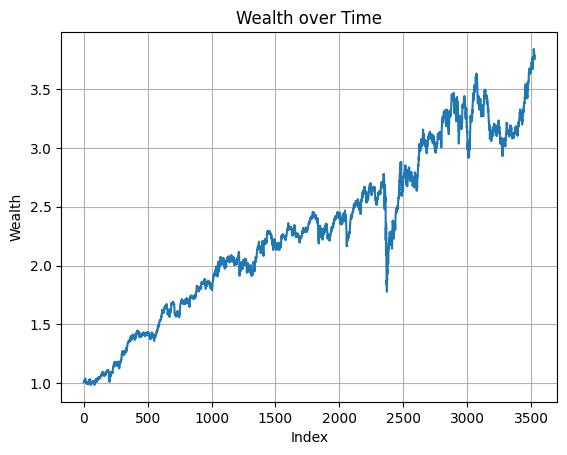

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the wealth data
plt.plot(result_df['Wealth'])
plt.title('Wealth over Time')
plt.xlabel('Index')
plt.ylabel('Wealth')
plt.grid(True)
plt.show()


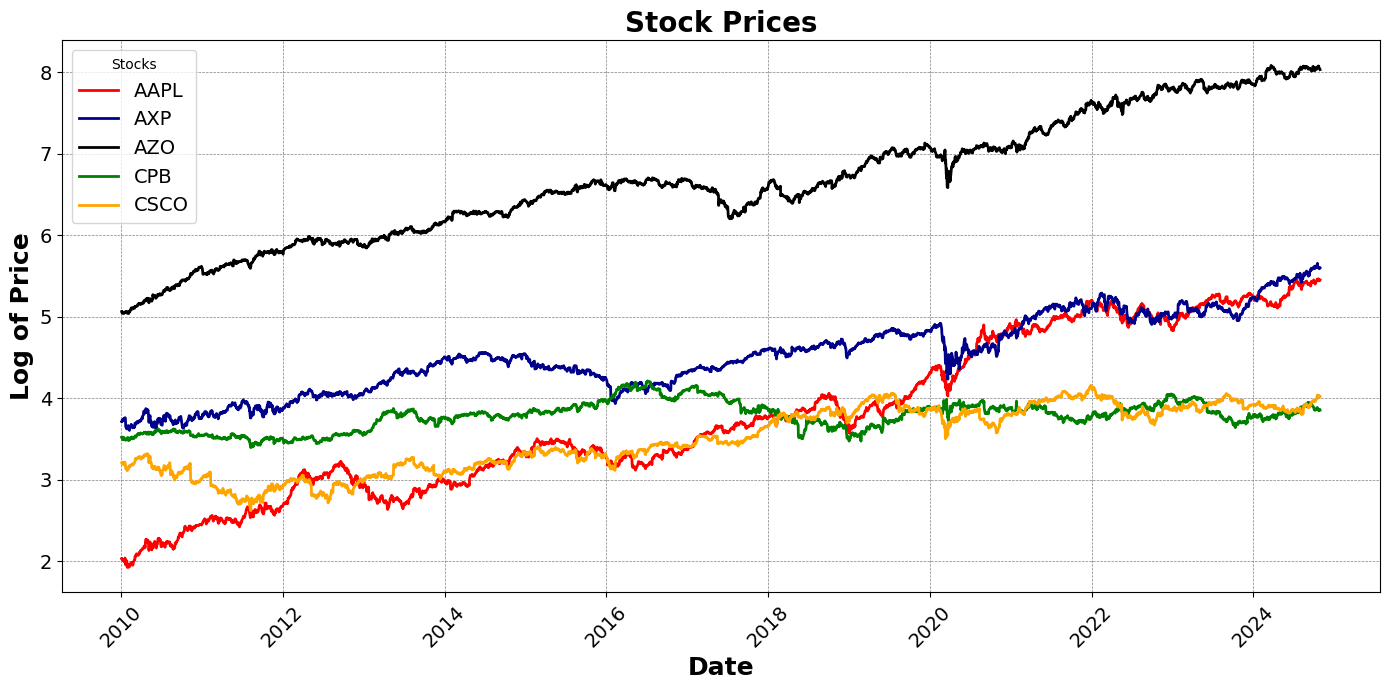

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data from the specified sheet
file_path = r"C:\Users\kamod\OneDrive\Escritorio\2024-2 U\Intc Soc\modelos-de-interacciones-sociales--main\trabajo final\Datos\Price_Stocks.xlsx"
close_df = pd.read_excel(file_path, sheet_name="Close")

# Ensure the 'Exchange Date' column is in datetime format
close_df['Exchange Date'] = pd.to_datetime(close_df['Exchange Date'])
close_df.set_index('Exchange Date', inplace=True)

# Select columns 2 to 6 (adjusting for zero-based indexing)
close_df_subset = close_df.iloc[:, 1:6]  # This selects columns 2 to 6

# Take the natural logarithm of the selected columns
ln_close_df_subset = np.log(close_df_subset)

# Specify colors for each stock
colors = ['red', 'darkblue', 'black', 'green', 'orange']  # You can adjust the colors as needed

# Create the time series plot
plt.figure(figsize=(14, 7))

# Plot each column with specified colors
for column, color in zip(ln_close_df_subset.columns, colors):
    plt.plot(ln_close_df_subset.index, ln_close_df_subset[column], label=column, color=color, linewidth=2)

# Update titles and labels with larger font sizes
plt.title('Stock Prices', fontsize=20, fontweight='bold')  # Larger title font
plt.xlabel('Date', fontsize=18, fontweight='bold')          # Larger x label font
plt.ylabel('Log of Price', fontsize=18, fontweight='bold')  # Larger y label font
plt.xticks(rotation=45, fontsize=14)                        # Larger x tick font
plt.yticks(fontsize=14)                                      # Larger y tick font
plt.legend(title='Stocks', fontsize=14)                      # Legend font size
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot to the same directory as the file
save_path = os.path.join(os.path.dirname(file_path), 'stock_prices_plot.png')
plt.savefig(save_path)

# Show the plot
plt.show()